<a href="https://colab.research.google.com/github/moraes-ederson/Curso_DominandoDS_Flai/blob/main/5_ML_Classificacao_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
titanic = pd.read_csv('/content/train.csv')
teste = pd.read_csv('/content/test.csv')

In [ ]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Análise Exploratória dos Dados Básica

### **Objetivos:**


*   Entender a natureza dos dados.
*   Verificar quais variáveis vão me ajudar e quais não vão (e que possivelmente possam ser descartadas).
*   Preparar uma solução básica via heurística





In [ ]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 277kB/s 
     |████████████████████████████████| 81kB 6.2MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import sweetviz

In [ ]:
eda_titanic = sweetviz.analyze(titanic)
eda_titanic.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
eda_teste = sweetviz.analyze(teste)
eda_teste.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
eda2 = sweetviz.compare_intra(titanic, titanic['Survived'] == 0, ['Vítima', 'Sobrevivente'])
eda2.show_html()

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



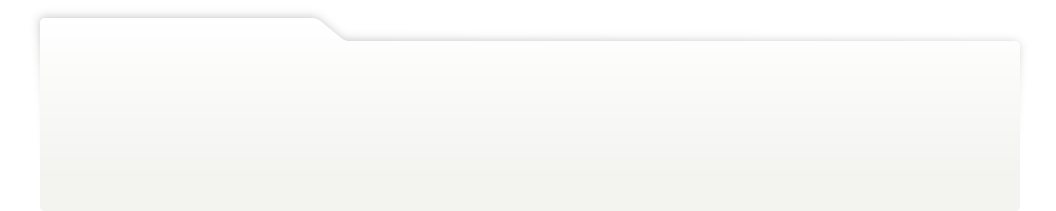
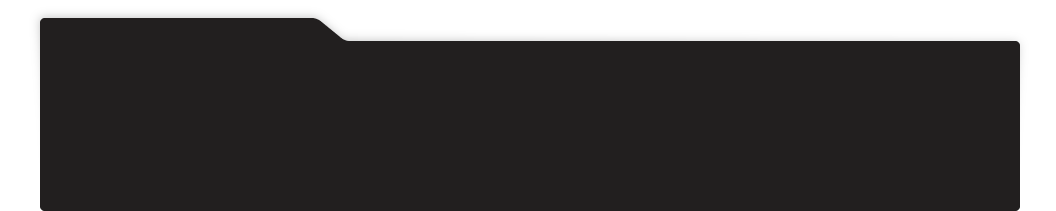
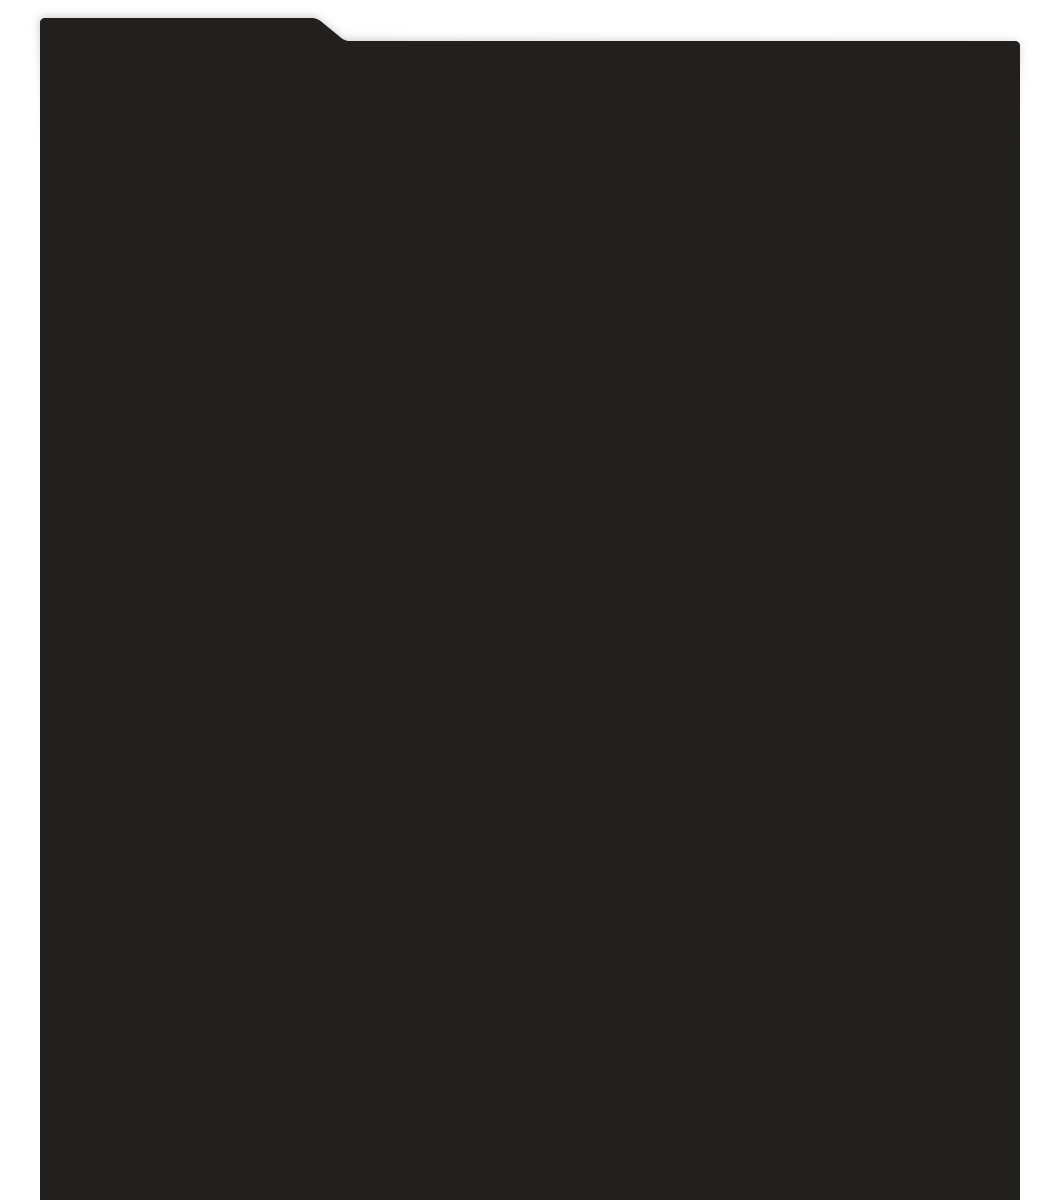
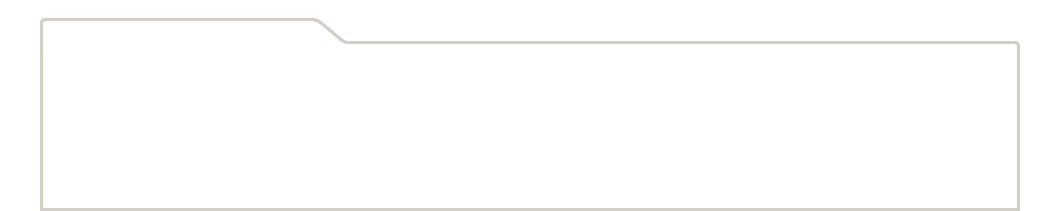
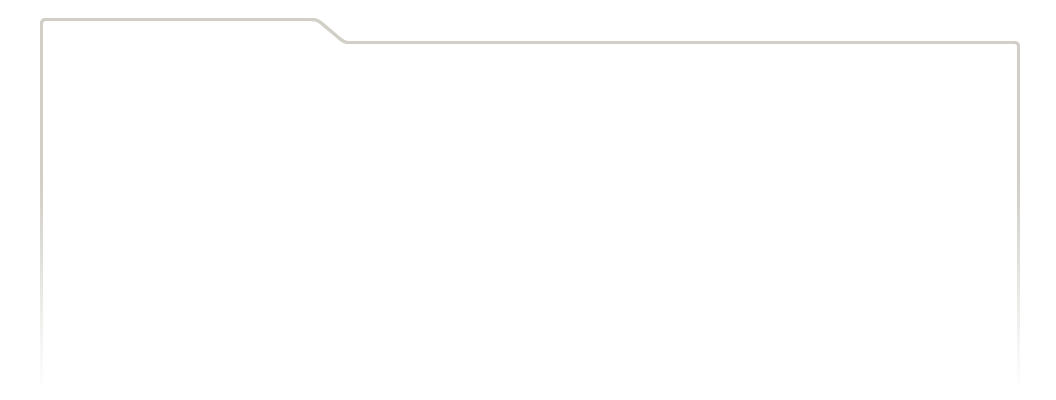
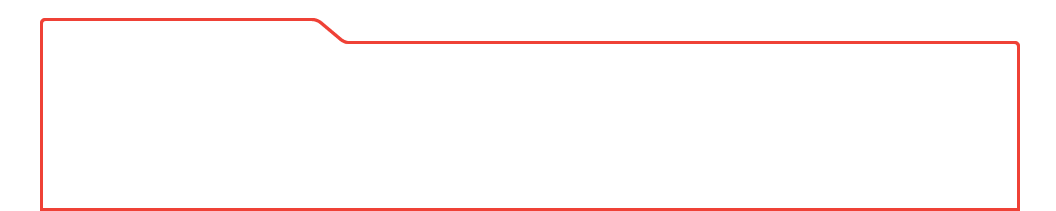
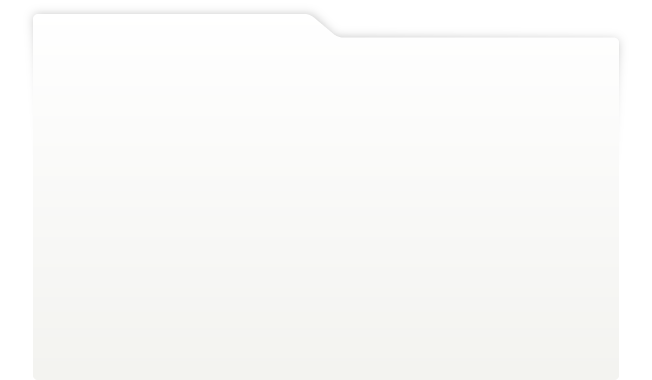
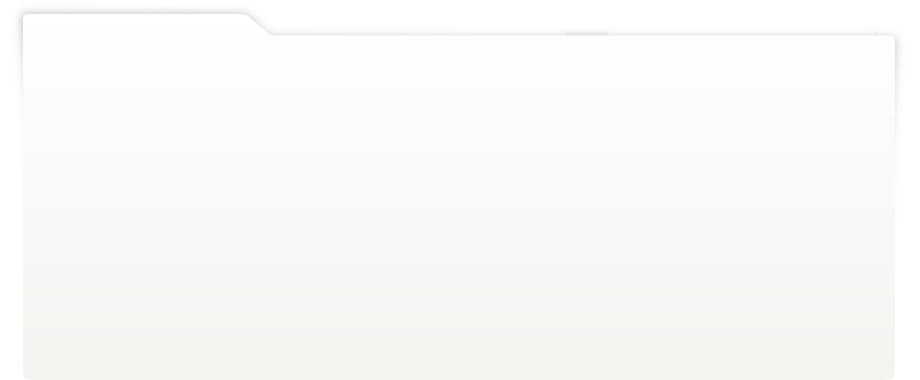
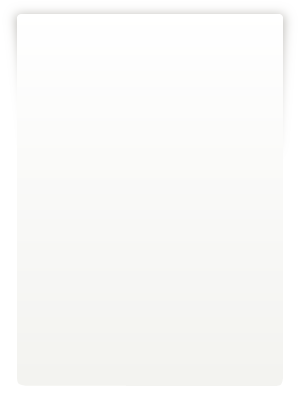
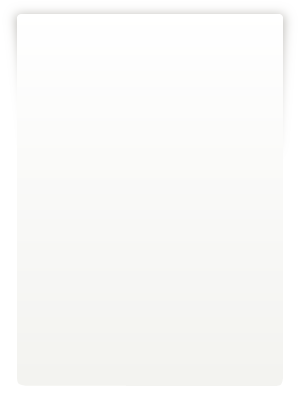
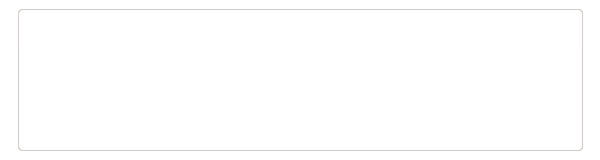
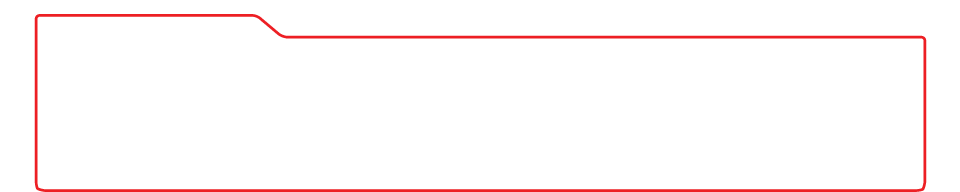
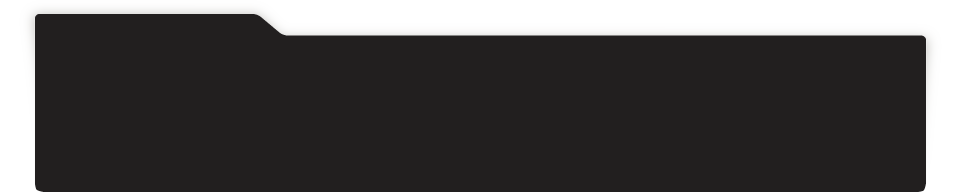
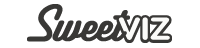
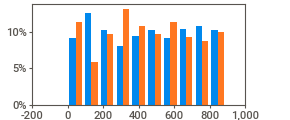
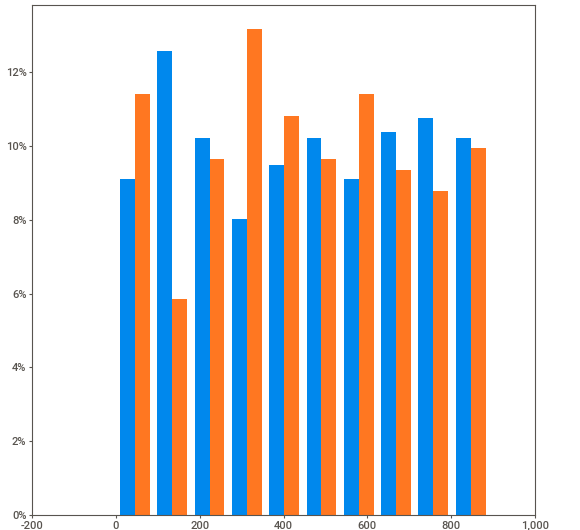
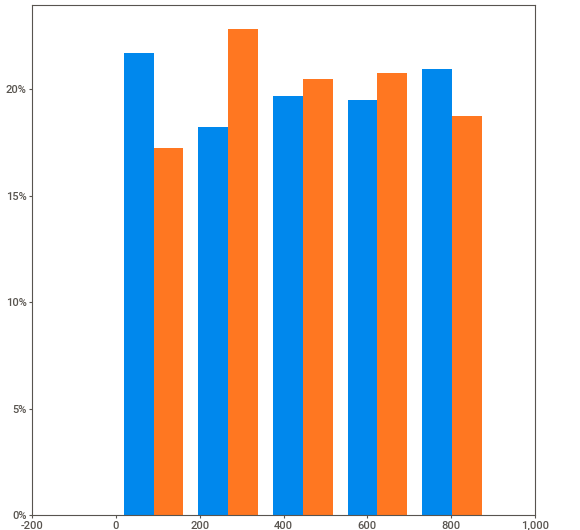
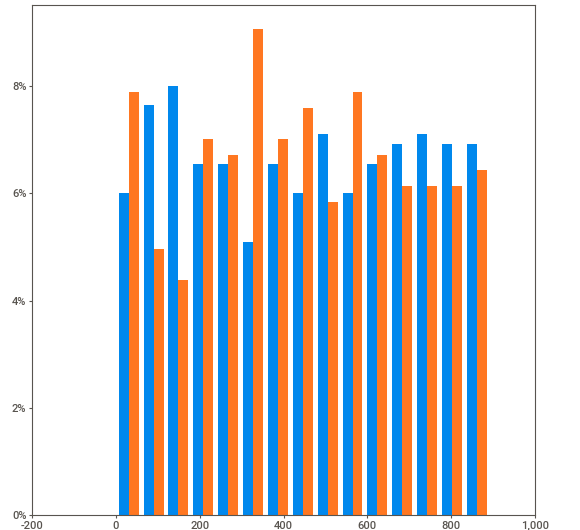
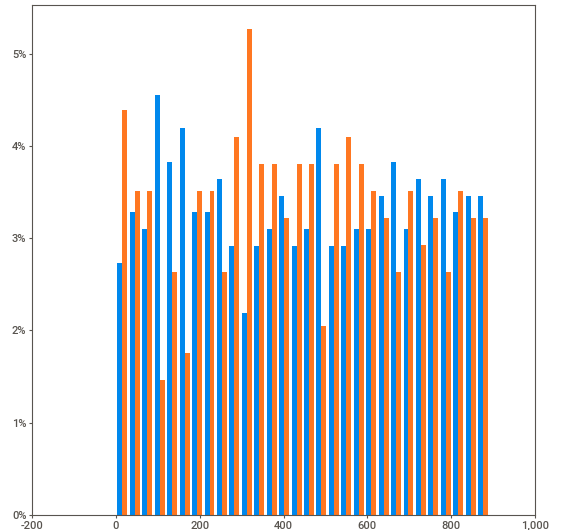
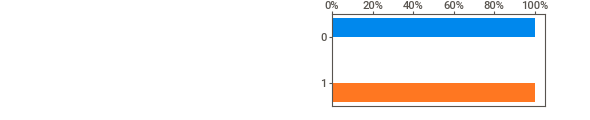
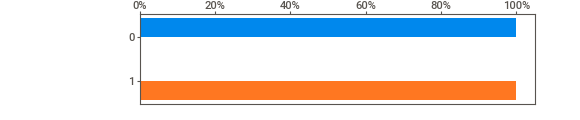
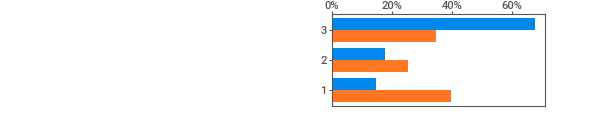
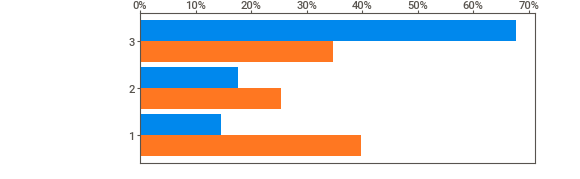
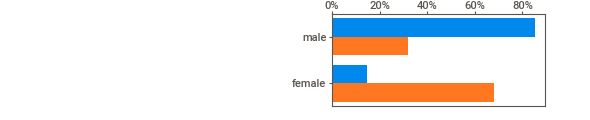
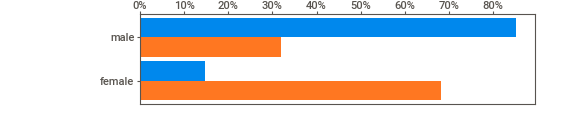
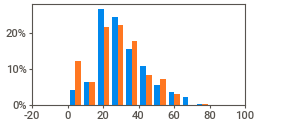
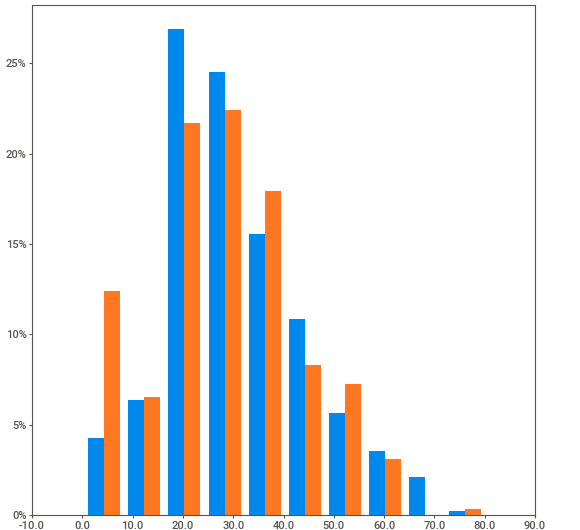
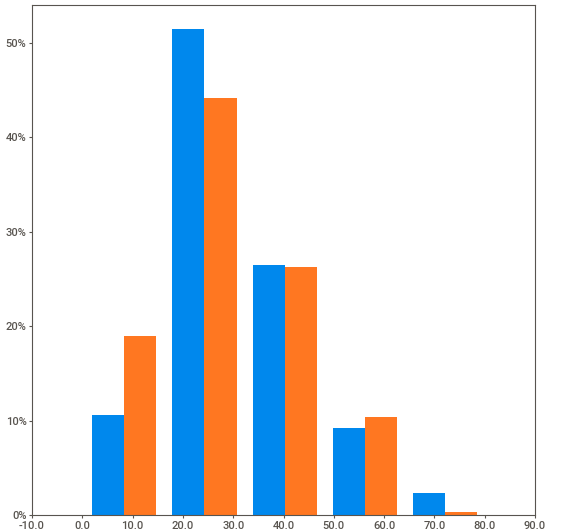
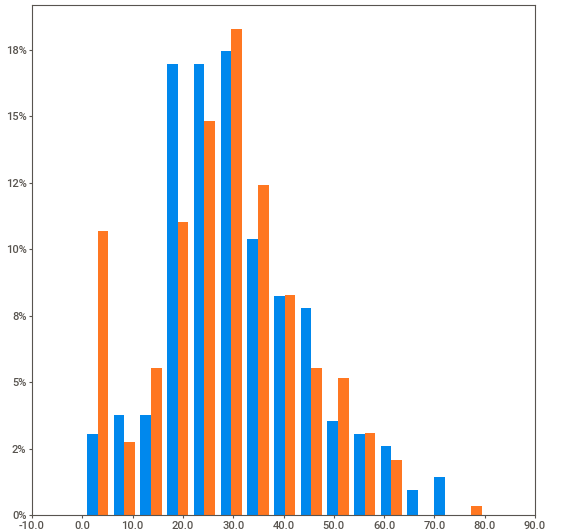
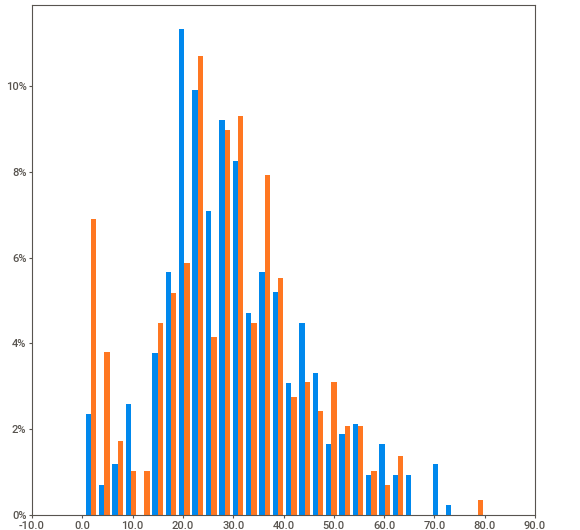
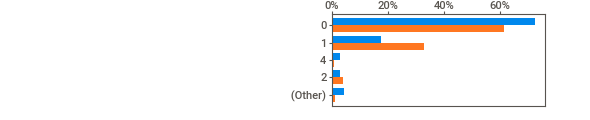
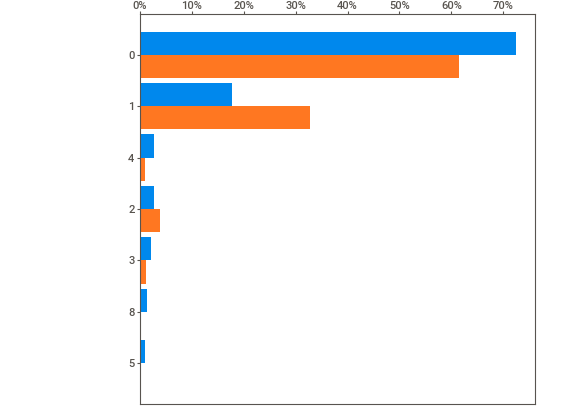
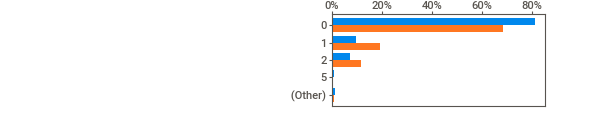
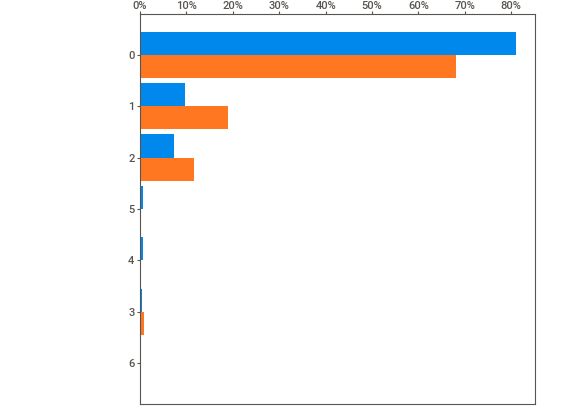
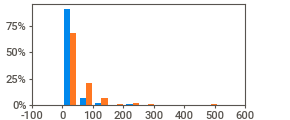
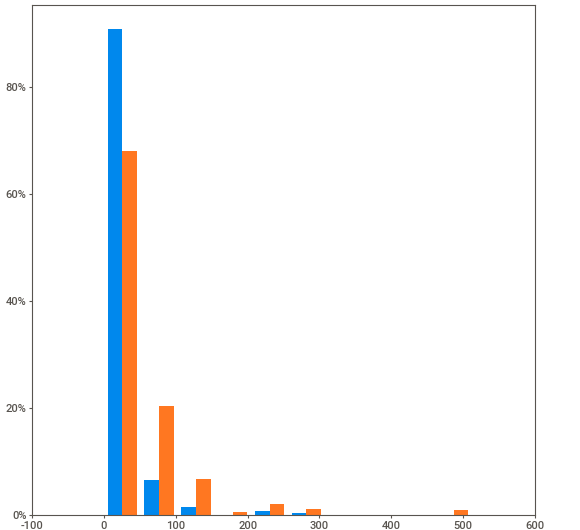
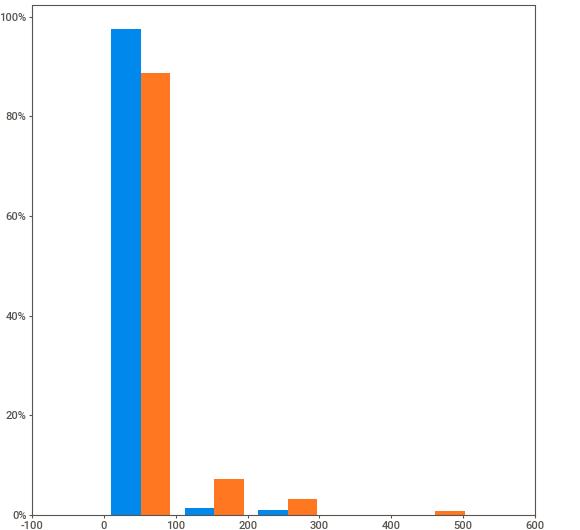
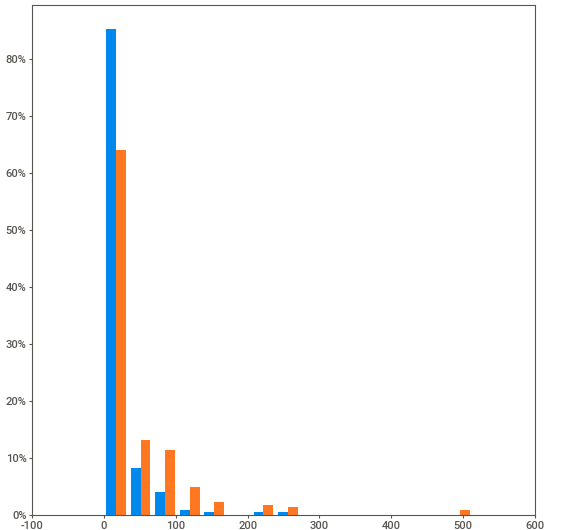
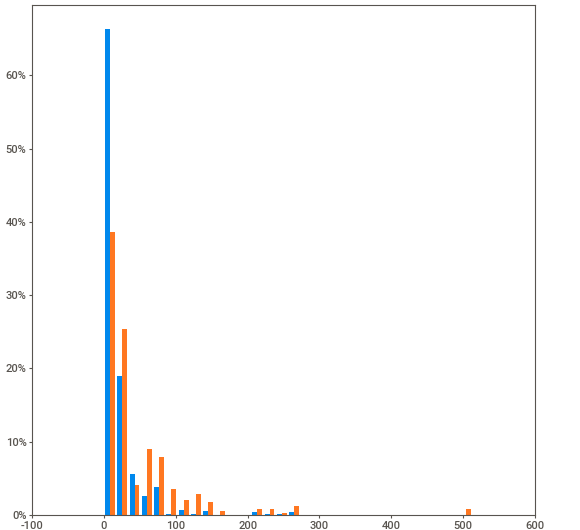
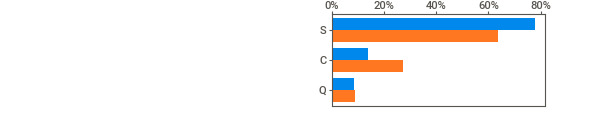
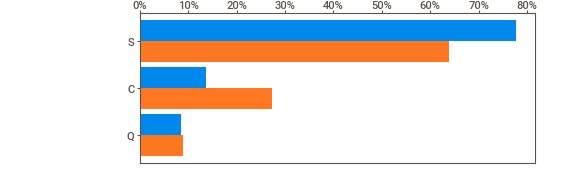
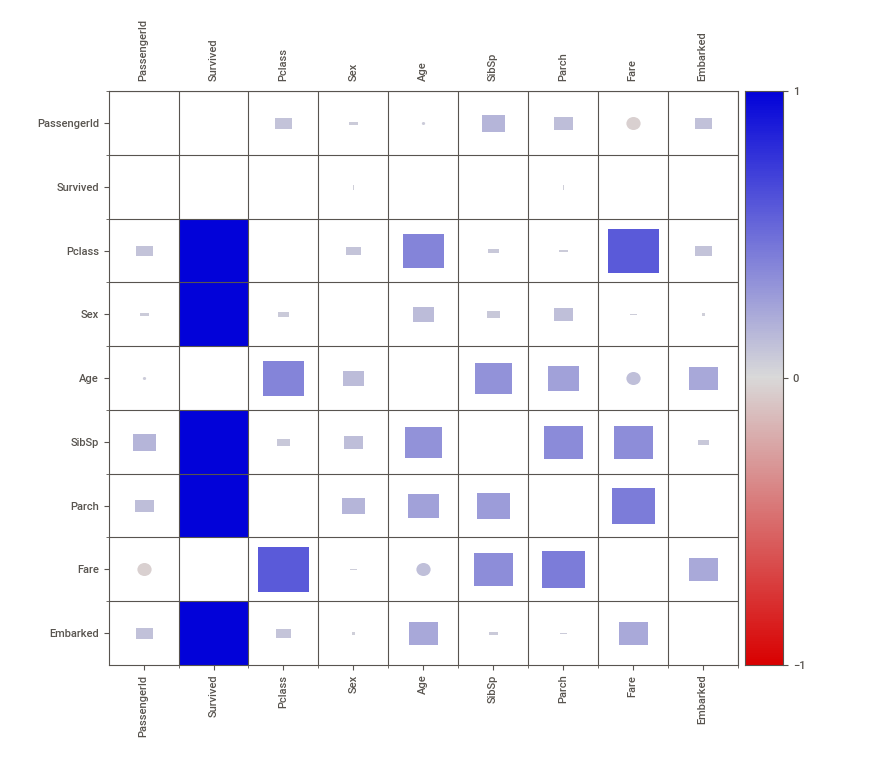
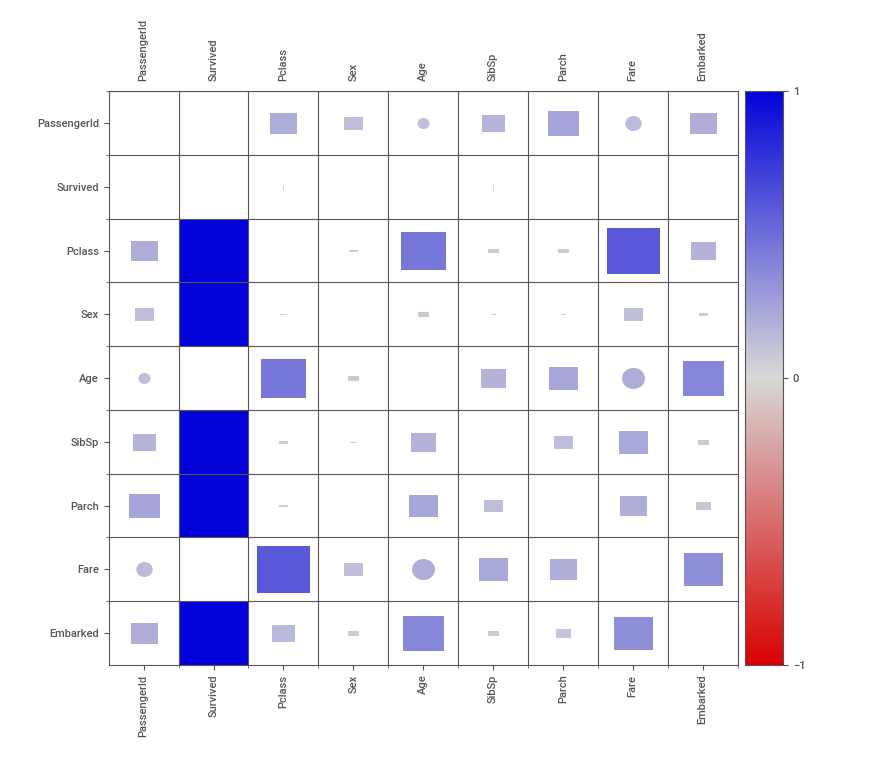

In [ ]:
import IPython
IPython.display.HTML(filename='/content/SWEETVIZ_REPORT.html')

# Uma solução básica baseada em uma heurística: "toda mulher sobrevive, todo homem não sobrevive.

In [ ]:
teste1 = titanic['Sex'].map({'male': 0, 'female': 1})
teste1

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [ ]:
# acuracia da heurística
(teste1 == titanic['Survived']).mean()

0.7867564534231201

Mini-exercício: teste o desempenho da heurística: "*mulheres e crianças sobrevivem, o restante não*.

# **Pré-processamento para Machine Learning**

Precisamos escolher quais variáveis utilizar, e deixá-las todas em formato numérico, deixando assim apropriado para utilizar os modelos de Machine Learning

Vamos descartar as seguintes variáveis:

*   PassengerID: é apenas o ID do usuário, não nenhuma informação nela.
*   Nome: que informação pode estar contida no nome de uma pessoa?
*   Ticket: pelo que vimos, é apenas um número associado ao ticket, sem um padrão muito bem definido.
*   Cabin: pelo fato de que há muito missing data nessa variável.

## Descarte de variáveis não importantes

In [ ]:
# dropando as variáveis de interesse em cada conjunto de dados
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
teste.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
teste.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


## Dados incompletos ou faltantes

In [ ]:
import missingno as msno

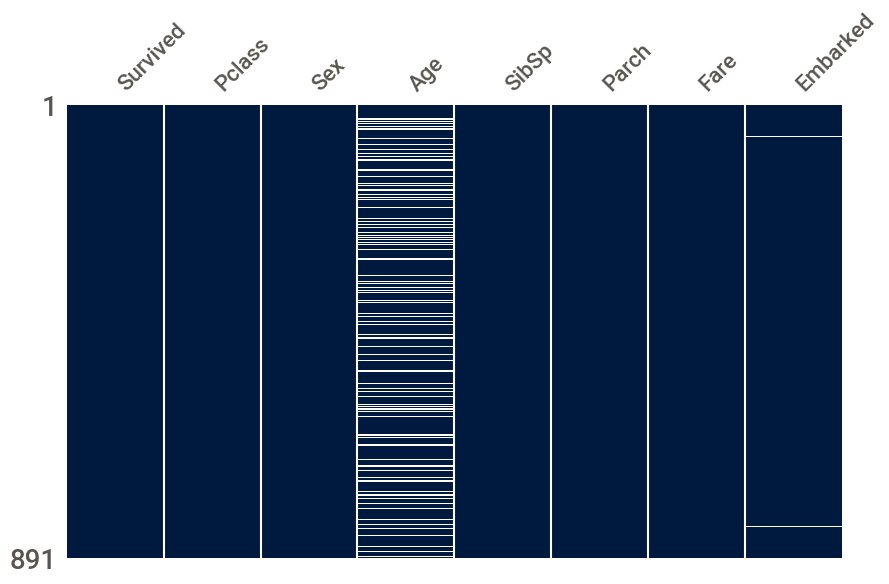

In [ ]:
msno.matrix(titanic, figsize = (10, 6), color = (0, 0.1, 0.25), sparkline = False);

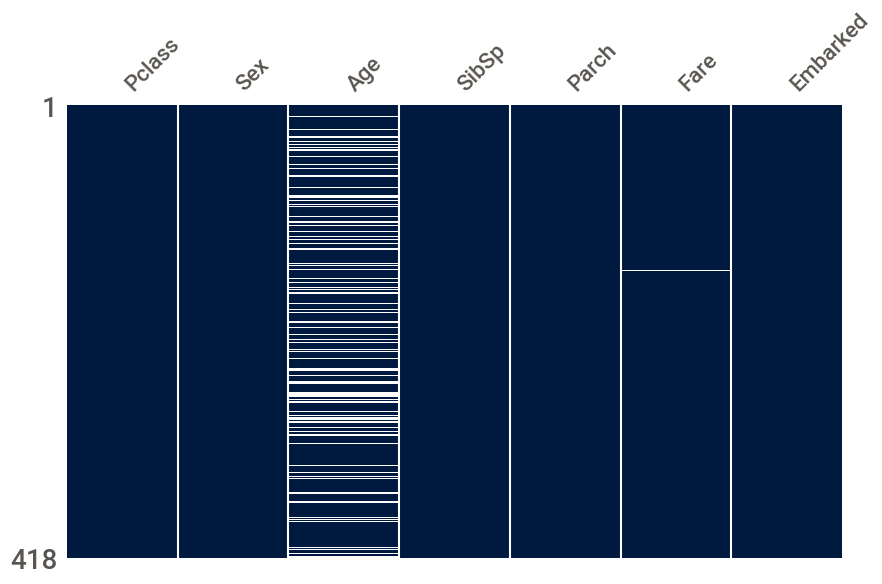

In [ ]:
msno.matrix(teste, figsize = (10, 6), color = (0, 0.1, 0.25), sparkline = False);

In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
teste.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# separando as medianas de "age" e "fare" p/ serem preenchidas nos dados faltantes
med_age = titanic['Age'].median()
med_fare = titanic['Fare'].median()

In [ ]:
# por ser categórica, separando a moda de "embarked"
moda_emb = titanic['Embarked'].mode()[0]

In [ ]:
# preenchendo os dados faltantes das colunas com os valores acima. Dados de treino.
titanic['Age'] = titanic['Age'].fillna(med_age)
titanic['Fare'] = titanic['Fare'].fillna(med_fare)
titanic['Embarked'] = titanic['Embarked'].fillna(moda_emb)

In [ ]:
# preenchendo os dados de teste com os mesmos dados de treino. Boa prática sempre utilizar os dados de treino nesses casos.
teste['Age'] = teste['Age'].fillna(med_age)
teste['Fare'] = teste['Fare'].fillna(med_fare)
teste['Embarked'] = teste['Embarked'].fillna(moda_emb)

In [ ]:
# conferindo dados faltantes
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
teste.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Codificar variáveis categóricas

In [ ]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
teste['Sex'] = teste['Sex'].map({'male': 0, 'female': 1})

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [ ]:
teste.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S


In [ ]:
titanic.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
774,1,2,1,54.0,1,3,23.0000,S
301,1,3,0,28.0,2,0,23.2500,Q
832,0,3,0,28.0,0,0,7.2292,C
64,0,1,0,28.0,0,0,27.7208,C
166,1,1,1,28.0,0,1,55.0000,S
582,0,2,0,54.0,0,0,26.0000,S
221,0,2,0,27.0,0,0,13.0000,S
257,1,1,1,30.0,0,0,86.5000,S
371,0,3,0,18.0,1,0,6.4958,S
522,0,3,0,28.0,0,0,7.2250,C


In [ ]:
pd.get_dummies(titanic['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
pd.get_dummies(titanic['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [ ]:
titanic = pd.get_dummies(titanic, columns = ['Embarked', 'Pclass'])

In [ ]:
teste = pd.get_dummies(teste, columns = ['Embarked', 'Pclass'])

In [ ]:
titanic.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1


## Mudar a escala das variáveis contínuas

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
aux0 = sc.fit_transform(titanic[['Age', 'Fare']]) # ajusta as colunas para melhor escala
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa']) # gerando um dataset com os novos valores escalonados
titanic = pd.concat([titanic, aux1], axis = 1) # concatenando novo dataset ao dataset original
titanic.drop(['Age', 'Fare'], axis = 1, inplace = True) # excluindo as variáveis antigas

Aplicando para os dados de teste, porém a escala não é ajustada, mas sim apenas transformada. O ajuste é feito somente nos dados de treino.

In [ ]:
aux0 = sc.transform(teste[['Age', 'Fare']]) # transforma as colunas para melhor escala
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa']) # gerando um dataset com os novos valores escalonados
teste = pd.concat([teste, aux1], axis = 1) # concatenando novo dataset ao dataset original
teste.drop(['Age', 'Fare'], axis = 1, inplace = True) # excluindo as variáveis antigas

In [ ]:
teste.head()

,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa
0,0,0,0,0,1,0,0,0,1,0.394887,-0.490783
1,1,1,0,0,0,1,0,0,1,1.355510,-0.507479
2,0,0,0,0,1,0,0,1,0,2.508257,-0.453367
3,0,0,0,0,0,1,0,0,1,-0.181487,-0.474005
4,1,1,1,0,0,1,0,0,1,-0.565736,-0.401017


In [ ]:
titanic.head()

,Survived,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa
0,0,0,1,0,0,0,1,0,0,1,-0.565736,-0.502445
1,1,1,1,0,1,0,0,1,0,0,0.663861,0.786845
2,1,1,0,0,0,0,1,0,0,1,-0.258337,-0.488854
3,1,1,1,0,0,0,1,1,0,0,0.433312,0.420730
4,0,0,0,0,0,0,1,0,0,1,0.433312,-0.486337


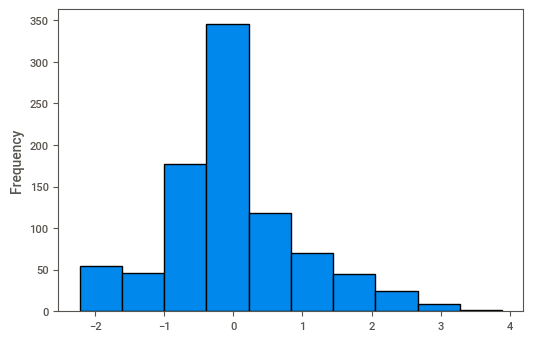

In [ ]:
titanic['Idade'].plot(kind = 'hist', edgecolor = 'black')

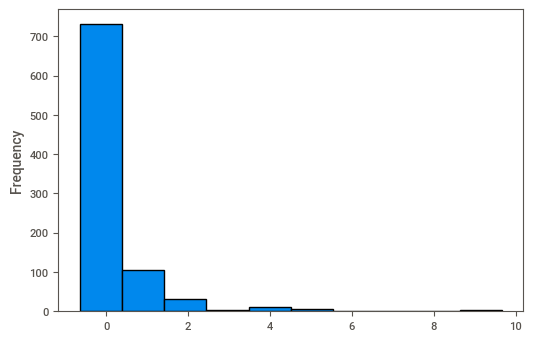

In [ ]:
titanic['Tarifa'].plot(kind = 'hist', edgecolor = 'black')

# **CENÁRIO 1:** Nesse ponto, temos os conjuntos pré-processados, prontos para passar para etapa de Machine Learning. Mas será que isso é tudo que podemos fazer?

In [ ]:
# reservando para um momento posterior
titanic1 = titanic.copy()
teste1 = teste.copy()

# Outra proposta de pré-processamento

## **Engenharia de Variáveis**

Tamanho da Família

In [ ]:
# parentes horizontais + parentes verticais + própria pessoa
titanic['Familia'] = titanic['SibSp'] + titanic['Parch'] + 1
teste['Familia'] = teste['SibSp'] + teste['Parch'] + 1

In [ ]:
# criando a variável "Sozinho" para qdo resultado da família for 1 (sozinho)
def aux(x):
  if x == 1:
    return 1
  else:
    return 0

titanic['Sozinho'] = titanic['Familia'].apply(aux)
teste['Sozinho'] = teste['Familia'].apply(aux)

In [ ]:
teste.sample(10)

,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Familia,Sozinho
275,1,1,0,0,0,1,0,1,0,-0.719436,-0.124920,2,0
284,1,1,1,0,0,1,0,0,1,-2.102733,-0.241449,3,0
317,0,0,0,0,0,1,0,1,0,-0.796286,-0.437007,1,1
80,0,1,1,1,0,0,0,0,1,-1.795334,-0.341452,3,0
362,1,0,0,0,0,1,0,1,0,0.125912,-0.225593,1,1
108,0,0,0,0,0,1,0,0,1,-0.104637,-0.472998,1,1
99,0,0,0,0,0,1,0,0,1,0.279612,-0.486337,1,1
10,0,0,0,0,0,1,0,0,1,-0.104637,-0.489442,1,1
24,1,1,3,1,0,0,1,0,0,1.432359,4.634417,5,0
166,0,0,0,1,0,0,1,0,0,1.432359,0.368295,1,1


In [ ]:
# mostrando a taxa de sobrevivência se estivesse ou não sozinho
titanic['Sozinho'].groupby(titanic['Survived']).mean()

Survived
0    0.681239
1    0.476608
Name: Sozinho, dtype: float64

In [ ]:
# excluindo as variáveis utilizadas para criar a variável "Sozinho"
titanic.drop(['SibSp', 'Parch', 'Familia'], axis = 1, inplace = True)
teste.drop(['SibSp', 'Parch', 'Familia'], axis = 1, inplace = True)

In [ ]:
titanic.head()

,Survived,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Sozinho
0,0,0,0,0,1,0,0,1,-0.565736,-0.502445,0
1,1,1,1,0,0,1,0,0,0.663861,0.786845,0
2,1,1,0,0,1,0,0,1,-0.258337,-0.488854,1
3,1,1,0,0,1,1,0,0,0.433312,0.420730,0
4,0,0,0,0,1,0,0,1,0.433312,-0.486337,1


## Utilizando a variável 'Name'

Veja que há um padrão no formato dos nomes: é sempre o sobrenome, seguido de uma vírgula, depois a **titulação da pessoa**, e em seguida vem o primeiro nome. A titulação da pessoa pode ser uma variável preditora importante nesse problema. Vamos transformar essa variável em algo mais tratável:

In [ ]:
# carregando apenas a coluna 'Name' novamente pois ela havia sido excluída.
nome = pd.read_csv('/content/train.csv', usecols = ['Name'])
nome.head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [ ]:
nome.iloc[0, 0]

'Braund, Mr. Owen Harris'

In [ ]:
# separando o nome antes e depois da vírgula/espaço
nome.iloc[0, 0].split(', ')

['Braund', 'Mr. Owen Harris']

In [ ]:
# o nome após a vírgula agora está na posição índice 1
nome.iloc[0, 0].split(', ')[1]

'Mr. Owen Harris'

In [ ]:
# separando a titulação do nome através do ponto.
nome.iloc[0, 0].split(', ')[1].split('.')

['Mr', ' Owen Harris']

In [ ]:
# selecionando apenas a titulação do nome.
nome.iloc[0, 0].split(', ')[1].split('.')[0]

'Mr'

Criando a variável 'Titulo' selecionando a titulação de todos os elementos.

In [ ]:
nome.shape[0]

891

In [ ]:
titulacao = []
for i in range(nome.shape[0]):
  titulacao.append(nome.iloc[i, 0].split(', ')[1].split('. ')[0])

In [ ]:
titanic['Titulo'] = titulacao

In [ ]:
titanic.head()

,Survived,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Sozinho,Titulo
0,0,0,0,0,1,0,0,1,-0.565736,-0.502445,0,Mr
1,1,1,1,0,0,1,0,0,0.663861,0.786845,0,Mrs
2,1,1,0,0,1,0,0,1,-0.258337,-0.488854,1,Miss
3,1,1,0,0,1,1,0,0,0.433312,0.420730,0,Mrs
4,0,0,0,0,1,0,0,1,0.433312,-0.486337,1,Mr


In [ ]:
# Mostrando todos os títulos listados e a contagem de cada título, ordenados pela maior contagem.
titanic['Survived'].groupby(titanic['Titulo']).describe().sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Titulo,,,,,,,,
Mr,517.0,0.156673,0.363844,0.0,0.00,0.0,0.00,1.0
Miss,182.0,0.697802,0.460477,0.0,0.00,1.0,1.00,1.0
Mrs,125.0,0.792000,0.407510,0.0,1.00,1.0,1.00,1.0
Master,40.0,0.575000,0.500641,0.0,0.00,1.0,1.00,1.0
Dr,7.0,0.428571,0.534522,0.0,0.00,0.0,1.00,1.0
Rev,6.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Major,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
Col,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
Mlle,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


Agrupando as variáveis menos frequentes em uma só chamada "Outros".

In [ ]:
nome = pd.read_csv('/content/train.csv', usecols = ['Name'])

titulacao = []
for i in range(nome.shape[0]):
  titulacao.append(nome.iloc[i, 0].split(', ')[1].split('. ')[0])

tt = []
for i in range(nome.shape[0]):
  if titulacao[i] in ['Mr', 'Miss', 'Mrs', 'Master']:
    tt.append(titulacao[i])
  else:
    tt.append('Outros')
  
titanic['Titulo'] = tt

In [ ]:
titanic['Survived'].groupby(titanic['Titulo']).describe().sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Titulo,,,,,,,,
Mr,517.0,0.156673,0.363844,0.0,0.0,0.0,0.0,1.0
Miss,182.0,0.697802,0.460477,0.0,0.0,1.0,1.0,1.0
Mrs,125.0,0.792000,0.407510,0.0,1.0,1.0,1.0,1.0
Master,40.0,0.575000,0.500641,0.0,0.0,1.0,1.0,1.0
Outros,27.0,0.444444,0.506370,0.0,0.0,0.0,1.0,1.0


In [ ]:
nome = pd.read_csv('/content/test.csv', usecols = ['Name'])

titulacao = []
for i in range(nome.shape[0]):
  titulacao.append(nome.iloc[i, 0].split(', ')[1].split('. ')[0])

tt = []
for i in range(nome.shape[0]):
  if titulacao[i] in ['Mr', 'Miss', 'Mrs', 'Master']:
    tt.append(titulacao[i])
  else:
    tt.append('Outros')
  
teste['Titulo'] = tt

A variável criada 'Titulo' é do tipo categórica, logo é necessário fazer a damificação dela também.

In [ ]:
titanic = pd.get_dummies(titanic, columns = ['Titulo'])

In [ ]:
titanic.head()

,Survived,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Sozinho,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Outros
0,0,0,0,0,1,0,0,1,-0.565736,-0.502445,0,0,0,1,0,0
1,1,1,1,0,0,1,0,0,0.663861,0.786845,0,0,0,0,1,0
2,1,1,0,0,1,0,0,1,-0.258337,-0.488854,1,0,1,0,0,0
3,1,1,0,0,1,1,0,0,0.433312,0.420730,0,0,0,0,1,0
4,0,0,0,0,1,0,0,1,0.433312,-0.486337,1,0,0,1,0,0


In [ ]:
teste = pd.get_dummies(teste, columns = ['Titulo'])

In [ ]:
teste.head()

,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Sozinho,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Outros
0,0,0,1,0,0,0,1,0.394887,-0.490783,1,0,0,1,0,0
1,1,0,0,1,0,0,1,1.355510,-0.507479,0,0,0,0,1,0
2,0,0,1,0,0,1,0,2.508257,-0.453367,1,0,0,1,0,0
3,0,0,0,1,0,0,1,-0.181487,-0.474005,1,0,0,1,0,0
4,1,0,0,1,0,0,1,-0.565736,-0.401017,0,0,0,0,1,0


# **CENÁRIO 2:** Pré-processamento adicional

In [ ]:
titanic2 = titanic.copy()
teste2 = teste.copy()

# **Modelos de Machine Learning**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Separando as variáveis explicativas da variável resposta.
X = titanic.drop('Survived', axis = 1)
Y = titanic['Survived']

In [ ]:
# Validação cruzada Leave One Out
kf = StratifiedKFold(n_splits = 10)

Regressão Logística

In [ ]:
# Verificando a performance da Regressão Logística

lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']

modelo = LogisticRegression()
accs_vc = cross_validate(modelo, X, Y, cv = kf, scoring = lista_de_medidas)

In [ ]:
accs_vc

{'fit_time': array([0.03910351, 0.02118039, 0.01811266, 0.01897168, 0.01760101,
        0.01877952, 0.01979446, 0.02226686, 0.02049708, 0.01763725]),
 'score_time': array([0.00694561, 0.00629997, 0.00620794, 0.0063467 , 0.00613284,
        0.00629616, 0.00624681, 0.00629234, 0.00628161, 0.00630045]),
 'test_accuracy': array([0.78888889, 0.83146067, 0.7752809 , 0.86516854, 0.80898876,
        0.78651685, 0.7752809 , 0.7752809 , 0.83146067, 0.85393258]),
 'test_balanced_accuracy': array([0.77532468, 0.82433155, 0.74518717, 0.86283422, 0.80614973,
        0.75989305, 0.76203209, 0.74518717, 0.8131016 , 0.8494709 ]),
 'test_f1': array([0.72463768, 0.7826087 , 0.67741935, 0.82857143, 0.76056338,
        0.6984127 , 0.70588235, 0.67741935, 0.76923077, 0.81690141]),
 'test_precision': array([0.73529412, 0.77142857, 0.75      , 0.80555556, 0.72972973,
        0.75862069, 0.70588235, 0.75      , 0.80645161, 0.80555556]),
 'test_recall': array([0.71428571, 0.79411765, 0.61764706, 0.85294118, 0.7

In [ ]:
accs_vc['test_accuracy']

array([0.78888889, 0.83146067, 0.7752809 , 0.86516854, 0.80898876,
       0.78651685, 0.7752809 , 0.7752809 , 0.83146067, 0.85393258])

In [ ]:
print(accs_vc['test_accuracy'].mean())
print(accs_vc['test_recall'].mean())
print(accs_vc['test_precision'].mean())
print(accs_vc['test_balanced_accuracy'].mean())
print(accs_vc['test_f1'].mean())

0.8092259675405742
0.7307563025210084
0.7618518185416046
0.7943512152335682
0.7441647124377481


In [ ]:
# verificando a performance da Regressão Logística
def MachineLearning(dataset):

    X = dataset.drop('Survived', axis = 1)
    y = dataset['Survived']

    lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']

    nome_das_medidas = ['acurácia', 'sensibilidade', 'vpp', 'eficiência', 'f1-score']

    lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=300, max_depth = 3, max_features = 3),
                        RandomForestClassifier(n_estimators=300, max_depth = 3, max_features = 4),
                        RandomForestClassifier(n_estimators=300, max_depth = 6, max_features = 3),
                        RandomForestClassifier(n_estimators=300, max_depth = 6, max_features = 4)]

    nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (prof = 3, mf = 3)',
                        'Random Forest (prof = 3, mf = 4)',
                        'Random Forest (prof = 6, mf = 3)',
                        'Random Forest (prof = 6, mf = 4)']

    resultados0 = {}

    for i in range(len(lista_de_modelos)):
        print('Rodando modelo: ' + nome_dos_modelos[i])
        accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = kf, scoring = lista_de_medidas)

        acc = accs_vc['test_accuracy'].mean()
        sen = accs_vc['test_recall'].mean()
        vpp = accs_vc['test_precision'].mean()
        bac = accs_vc['test_balanced_accuracy'].mean()
        f1s = accs_vc['test_f1'].mean()

        resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, f1s, bac]
    
    resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

    return resultados

In [ ]:
titanic1.head()

,Survived,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa
0,0,0,1,0,0,0,1,0,0,1,-0.565736,-0.502445
1,1,1,1,0,1,0,0,1,0,0,0.663861,0.786845
2,1,1,0,0,0,0,1,0,0,1,-0.258337,-0.488854
3,1,1,1,0,0,0,1,1,0,0,0.433312,0.420730
4,0,0,0,0,0,0,1,0,0,1,0.433312,-0.486337


In [ ]:
titanic2.head()

,Survived,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Sozinho,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Outros
0,0,0,0,0,1,0,0,1,-0.565736,-0.502445,0,0,0,1,0,0
1,1,1,1,0,0,1,0,0,0.663861,0.786845,0,0,0,0,1,0
2,1,1,0,0,1,0,0,1,-0.258337,-0.488854,1,0,1,0,0,0
3,1,1,0,0,1,1,0,0,0.433312,0.420730,0,0,0,0,1,0
4,0,0,0,0,1,0,0,1,0.433312,-0.486337,1,0,0,1,0,0


### Analisando CENÁRIO 1

In [ ]:
MachineLearning(titanic1)

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (prof = 3, mf = 3)
Rodando modelo: Random Forest (prof = 3, mf = 4)
Rodando modelo: Random Forest (prof = 6, mf = 3)
Rodando modelo: Random Forest (prof = 6, mf = 4)


,acurácia,sensibilidade,vpp,eficiência,f1-score
Regressão Logística,0.799126,0.698655,0.761100,0.725533,0.780153
Árvore (prof = 3),0.815930,0.704370,0.794742,0.742515,0.794761
Árvore (prof = 5),0.804794,0.672353,0.791219,0.721692,0.779695
Árvore (prof = 7),0.821648,0.675378,0.832926,0.741605,0.793935
5-NN,0.805855,0.719412,0.762317,0.737985,0.789571
15-NN,0.785680,0.646723,0.760100,0.695777,0.759590
25-NN,0.800300,0.655210,0.791310,0.714529,0.772992
Bagging,0.811523,0.728151,0.769518,0.745287,0.795776
"Random Forest (prof = 3, mf = 3)",0.802522,0.590924,0.847771,0.693948,0.762701
"Random Forest (prof = 3, mf = 4)",0.823783,0.619832,0.885845,0.727907,0.785337


### Analisando CENÁRIO 2

In [ ]:
MachineLearning(titanic2)

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (prof = 3, mf = 3)
Rodando modelo: Random Forest (prof = 3, mf = 4)
Rodando modelo: Random Forest (prof = 6, mf = 3)
Rodando modelo: Random Forest (prof = 6, mf = 4)


,acurácia,sensibilidade,vpp,eficiência,f1-score
Regressão Logística,0.809226,0.730756,0.761852,0.744165,0.794351
Árvore (prof = 3),0.823795,0.724706,0.797993,0.756111,0.804979
Árvore (prof = 5),0.818290,0.713866,0.789429,0.746145,0.798633
Árvore (prof = 7),0.821610,0.707731,0.801912,0.749696,0.800095
5-NN,0.817079,0.736807,0.776977,0.753587,0.801922
15-NN,0.804782,0.672605,0.789316,0.722389,0.779804
25-NN,0.800337,0.631681,0.809406,0.706370,0.768467
Bagging,0.824956,0.733866,0.796298,0.760272,0.807758
"Random Forest (prof = 3, mf = 3)",0.797965,0.713193,0.747088,0.727674,0.781900
"Random Forest (prof = 3, mf = 4)",0.806954,0.719076,0.764173,0.738285,0.790295


# Submetendo uma predição no Kaggle

Gerando os arquivos para fazer upload no site do Kaggle

In [ ]:
# modelo Random Forest com max_depth = 8
def Submissao(treino, teste, modelo, nome = 'submissaoKaggle'):

    X = treino.drop('Survived', axis = 1)
    y = treino['Survived']
 
    modelo.fit(X, y)
    pred = modelo.predict(teste)

    url = '/content/test.csv' 
    subm = pd.read_csv(url, usecols = ['PassengerId'] )  
    subm['Survived'] = pred
    
    subm.to_csv(nome + '.csv', index = False)

In [ ]:
rf = RandomForestClassifier(n_estimators = 300, max_depth = 6, max_features = 4)
# arvore = DecisionTreeClassifier(max_depth = 5)

Submissao(titanic1, teste1, modelo = rf, nome = 'SubmissaoRF-setup1')
Submissao(titanic2, teste2, modelo = rf, nome = 'SubmissaoRF-setup2')

# ver os arquivos gerados na aba da esquerda

#**Pergunta: o que podemos fazer para melhorar ainda mais a acurácia da nossa modelagem?**

##**Exercício**

a) Submeta uma predição no kaggle utilizando uma combinação de modelos 'hard'.

b) Explore outros cenários de pré-processamento.